In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Downloaded the data from:-
    https://www.kaggle.com/code/cdabakoglu/clustering-mall-customers-k-means/data

In [2]:
df=pd.read_csv('Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape

(200, 5)

In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [8]:
 df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [9]:
## dropping the 'CUSTOMER_ID' column from the further analysis:-
df.drop(['CustomerID'], axis=1, inplace=True)

In [10]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

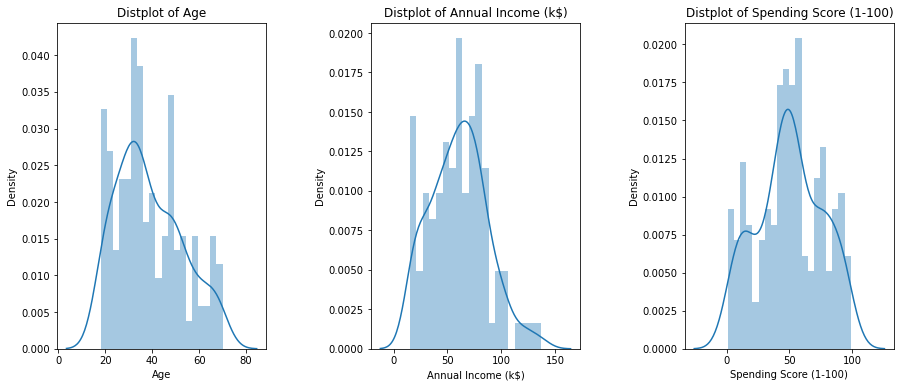

In [12]:
## distplot:-
plt.figure(1, figsize=(15,6))

n=0

for x in ["Age","Annual Income (k$)","Spending Score (1-100)"]:
    n+=1
    plt.subplot(1,3,n)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.distplot(df[x], bins=20)
    plt.title('Distplot of {}'.format(x))
plt.show()

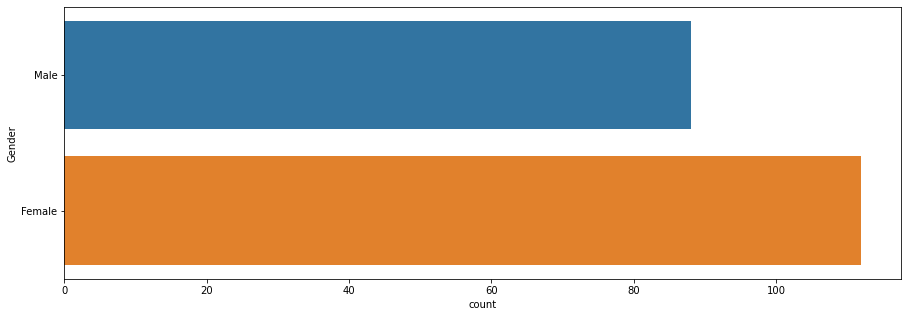

In [13]:
## drawing a count plot for the object64 column:- or a string column:-

plt.figure(figsize=(15,5))
sns.countplot(y="Gender", data=df)
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


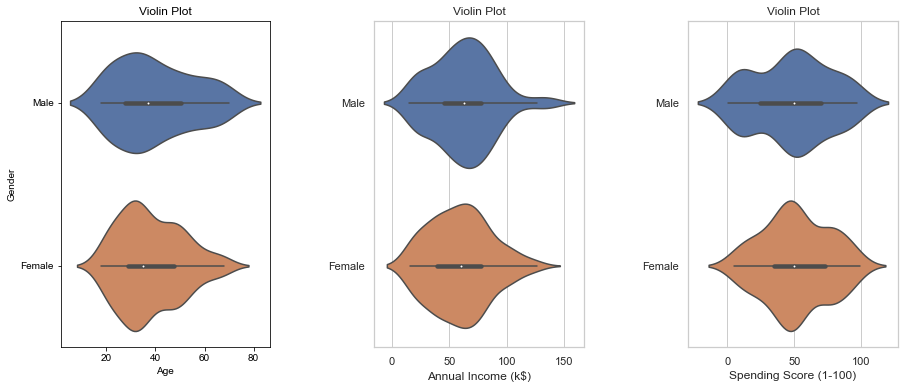

In [14]:
plt.figure(1, figsize=(15,6))

n=0

for x in ["Age","Annual Income (k$)","Spending Score (1-100)"]:
    n+=1
    plt.subplot(1,3,n)
    sns.set(style="whitegrid")
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.violinplot(x,y="Gender", data=df)
    plt.ylabel("Gender" if n==1 else '')
    plt.title('Violin Plot')
plt.show()

<span style='color:blue'> In terms of Ages:- </span>

In [15]:
## divide the age into different categories; or ranges; and then decide which range has the better customers.,;;::--
## Note that this is done';/or / has been decided using the mean/min and max of the data columns;,..!!..,,;;

age_18_25 = df.Age[(df.Age >=18) & (df.Age<=25)]
age_26_35 = df.Age[(df.Age >=26) & (df.Age<=35)]
age_36_45 = df.Age[(df.Age >=36) & (df.Age<=45)]
age_46_55 = df.Age[(df.Age >=46) & (df.Age<=55)]
age_55_above=df.Age[df.Age >= 56]

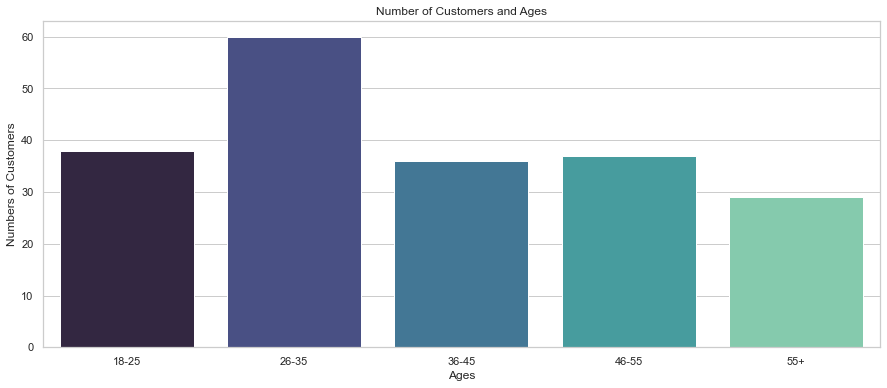

In [16]:
agex= ["18-25", "26-35", "36-45", "46-55", "55+"]
agey=[len(age_18_25),len(age_26_35),len(age_36_45),len(age_46_55),len(age_55_above)]

plt.figure(figsize=(15,6))
sns.barplot(x=agex, y=agey, palette="mako")
plt.title("Number of Customers and Ages")
plt.xlabel("Ages")
plt.ylabel("Numbers of Customers")
plt.show()

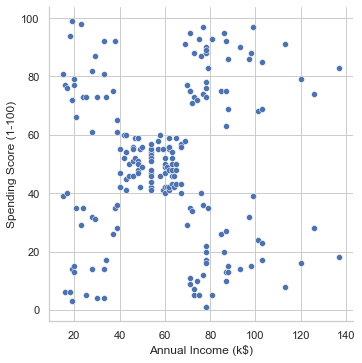

In [22]:
## realtionship between annual income and the spending score:-
##-------------------------------------------------------------------

sns.relplot(x="Annual Income (k$)", y="Spending Score (1-100)", data=df)

There isn't much relation in case/ when it comes for Annual income within the range of 20-40 or even from 80- higher ends..!!..,,;;
<br> But there is some relation within the members having an Annual Income lying between/or. within the range of 40k-60k $.!!.,;ll;;



<span style='color:blue'> In terms of Spending Scores:- </span>

In [23]:
## divide the spending_scores into different categories; or ranges; and then decide which range has the better customers.,;;::--
## Note that this is done';/or / has been decided using the mean/min and max of the data columns;,..!!..,,;;



ss_1_20 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"]>=1) & (df["Spending Score (1-100)"]<=20)]
ss_21_40 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"]>=21) & (df["Spending Score (1-100)"]<=40)]
ss_41_60 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"]>=41) & (df["Spending Score (1-100)"]<=60)]
ss_61_80 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"]>=61) & (df["Spending Score (1-100)"]<=80)]
ss_81_100 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"]>=81) & (df["Spending Score (1-100)"]<=100)]

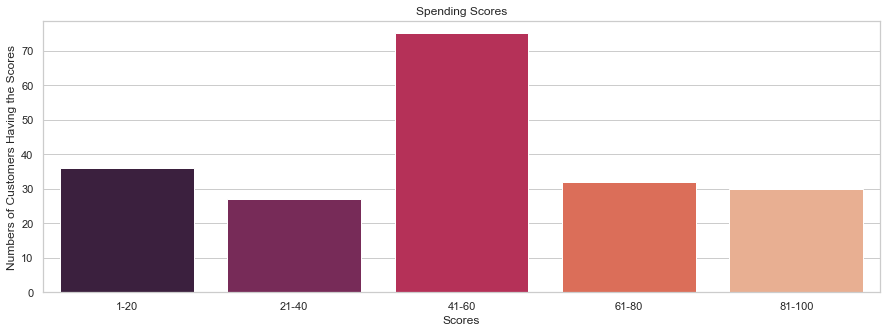

In [24]:
ssx=  ["1-20","21-40","41-60","61-80","81-100"]
ssy=  [len(ss_1_20),len(ss_21_40),len(ss_41_60),len(ss_61_80),len(ss_81_100)]

plt.figure(figsize=(15,5))
sns.barplot(x=ssx, y=ssy, palette="rocket")
plt.title("Spending Scores")
plt.xlabel("Scores")
plt.ylabel("Numbers of Customers Having the Scores")
plt.show()

Therefore.,;; we can conclude that the maximum number of customers are having the spending scores within the ranges of '41-60' ..!!..,,;;""

<span style='color:blue'> In terms of Annual Incomes:- </span>

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


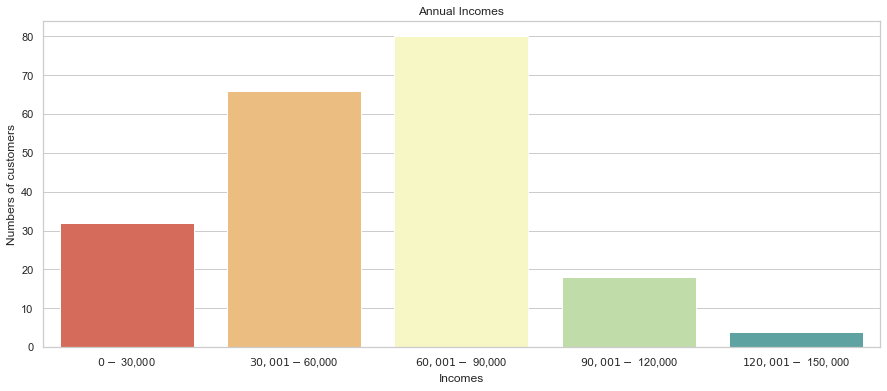

In [30]:
## divide the annual_incomes into different categories; or ranges; and then decide which range has the better customers.,;;::--
## Note that this is done';/or / has been decided using the mean/min and max of the data columns;,..!!..,,;;

a10_30 = df["Annual Income (k$)"][(df["Annual Income (k$)"]>=0)&(df["Annual Income (k$)"]<=30)]
a31_60 = df["Annual Income (k$)"][(df["Annual Income (k$)"]>=31)&(df["Annual Income (k$)"]<=60)]
a61_90 = df["Annual Income (k$)"][(df["Annual Income (k$)"]>=61)&(df["Annual Income (k$)"]<=90)]
a91_120 = df["Annual Income (k$)"][(df["Annual Income (k$)"]>=91)&(df["Annual Income (k$)"]<=120)]
a121_150 = df["Annual Income (k$)"][(df["Annual Income (k$)"]>=121)&(df["Annual Income (k$)"]<=150)]

aix= ["$ 0 - $ 30,000", "$ 30,001 - $60,000", "$ 60,001 - $ 90,000", "$ 90,001 - $ 120,000" , "$ 120,001 - $ 150, 000"]
aiy= [len(a10_30),len(a31_60),len(a61_90),len(a91_120),len(a121_150)]


plt.figure(figsize=(15,6))
sns.barplot(aix, aiy, palette="Spectral")
plt.title("Annual Incomes")
plt.xlabel("Incomes")
plt.ylabel("Numbers of customers")
plt.show()


In [31]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


<span style='color:blue'> Clusters formed based on Ages and Spending Scores:- </span>


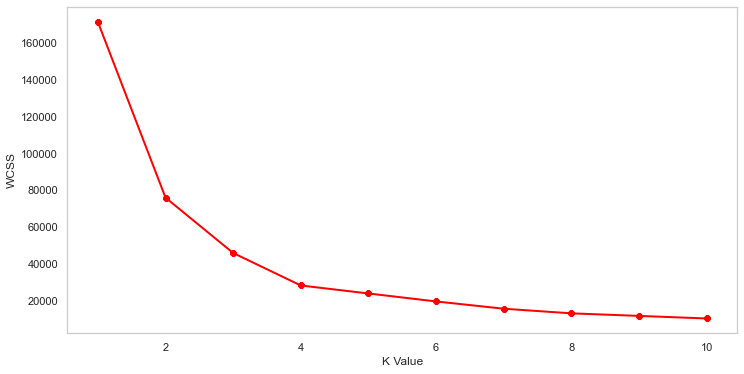

In [35]:
X1 = df.loc[:,["Age","Spending Score (1-100)"]].values

from sklearn.cluster import KMeans
wcss=[]
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11), wcss, linewidth=2, color="red", marker="8")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()

#### Therefore; over here we are basically taking a max of 11 clusters and trying to check at which number of clusters will we get the optimal results.,; therefore.,;; in this case it is 4 clusters ..!!..,,;; Since after that the graph line almost flattens ..!!..,,;;

In [51]:
## Therefore.,;; we are going to create clusters based on 'Age' and "'Spending Sscores'"..!!..,,;;

kmeans= KMeans(n_clusters=4)
label =kmeans.fit_predict(X1)
print(label)

[1 2 3 2 1 2 3 2 3 2 3 2 3 2 3 2 1 1 3 2 1 2 3 2 3 2 3 1 3 2 3 2 3 2 3 2 3
 2 3 2 0 2 0 1 3 1 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0
 0 1 0 1 1 0 0 1 0 0 1 0 0 1 1 0 0 1 0 1 1 1 0 1 0 1 1 0 0 1 0 1 0 0 0 0 0
 1 1 1 1 1 0 0 0 0 1 1 1 2 1 2 0 2 3 2 3 2 1 2 3 2 3 2 3 2 3 2 1 2 3 2 0 2
 3 2 3 2 3 2 3 2 3 2 3 2 0 2 3 2 3 2 3 2 3 1 3 2 3 2 3 2 3 2 3 2 3 2 3 2 1
 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2]


Therefore; we can check that the number of clusters formed are a total of 4.,;; since:-
    > 0
    > 1
    > 2
    > 3
    
  <br><br>  

In [37]:
## tTherefore.,;; checking the CENTROIDS:_--__--
print(kmeans.cluster_centers_)

[[30.1754386  82.35087719]
 [27.61702128 49.14893617]
 [43.29166667 15.02083333]
 [55.70833333 48.22916667]]


In [42]:
print(len(X1[:,0]))
print(len(X1[:,1]))

200
200


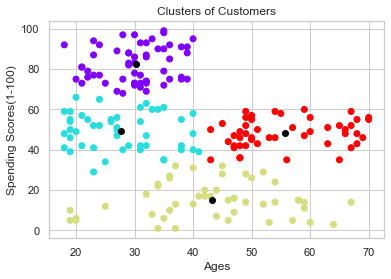

In [44]:
plt.scatter(X1[:,0], X1[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black')
plt.title("Clusters of Customers")
plt.xlabel("Ages")
plt.ylabel("Spending Scores(1-100)")
plt.show()

<span style='color:blue'> Clusters formed based on Annual Incomes and Spending Scores:- </span>


In [60]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


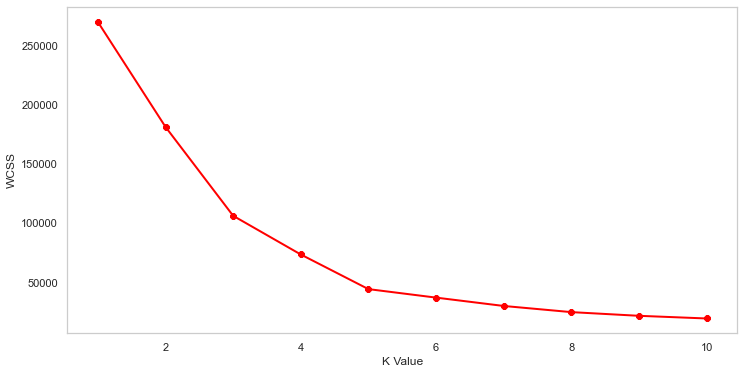

In [61]:
X2 = df.loc[:,["Annual Income (k$)","Spending Score (1-100)"]].values

from sklearn.cluster import KMeans
wcss=[]
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11), wcss, linewidth=2, color="red", marker="8")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()

#### Therefore; over here we are basically taking a max of 11 clusters and trying to check at which number of clusters will we get the optimal results.,; therefore.,;; in this case it is 5 clusters ..!!..,,;; Since after that the graph line almost flattens ..!!..,,;;

In [62]:
## Therefore.,;; we are going to create clusters based on 'Age' and "'Spending Sscores'"..!!..,,;;

kmeans= KMeans(n_clusters=5)
label =kmeans.fit_predict(X2)
print(label)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 0 4 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


Therefore; we can check that the number of clusters formed are a total of 5.,;; since:-
    > 0
    > 1
    > 2
    > 3
    >  4..!!..,,;;
    
  <br><br>  

In [63]:
## tTherefore.,;; checking the CENTROIDS:_--__--
print(kmeans.cluster_centers_)

[[55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [88.2        17.11428571]
 [25.72727273 79.36363636]
 [26.30434783 20.91304348]]


In [64]:
print(len(X2[:,0]))
print(len(X2[:,1]))

200
200


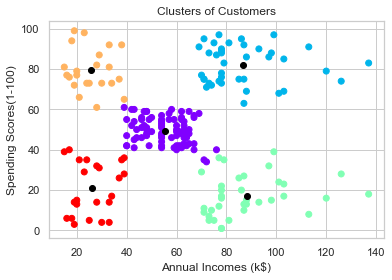

In [65]:
plt.scatter(X2[:,0], X2[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black')
plt.title("Clusters of Customers")
plt.xlabel("Annual Incomes (k$)")
plt.ylabel("Spending Scores(1-100)")
plt.show()

<span style='color:red'> Creating Clusters for/formed based on all three parameters, i.e.,; Ages, Annual Incomes and Spending Scores:- </span>


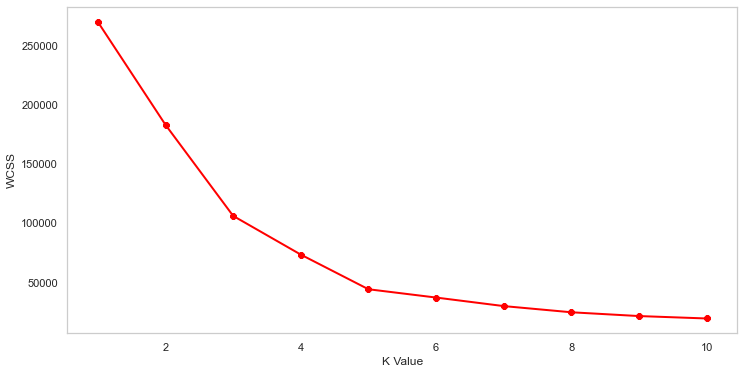

In [66]:
X3 = df.loc[:,["Age","Annual Income (k$)","Spending Score (1-100)"]].values

from sklearn.cluster import KMeans
wcss=[]
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11), wcss, linewidth=2, color="red", marker="8")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()

#### Therefore; over here we are basically taking a max of 11 clusters and trying to check at which number of clusters will we get the optimal results.,; therefore.,;; in this case it is 5 clusters ..!!..,,;; Since after that the graph line almost flattens ..!!..,,;;

In [67]:
## Therefore.,;; we are going to create clusters based on 'Age' and "'Spending Sscores'"..!!..,,;;

kmeans= KMeans(n_clusters=5)
label =kmeans.fit_predict(X3)
print(label)

[0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0
 3 0 3 0 3 0 3 0 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 3 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 1 4 1 2 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1]


Therefore; we can check that the number of clusters formed are a total of 5.,;; since:-
    > 0
    > 1
    > 2
    > 3
    >  4..!!..,,;;
    
  <br><br>  

In [68]:
## tTherefore.,;; checking the CENTROIDS:_--__--
print(kmeans.cluster_centers_)

[[45.2173913  26.30434783 20.91304348]
 [32.69230769 86.53846154 82.12820513]
 [43.93421053 55.21052632 49.44736842]
 [24.96       28.04       77.        ]
 [40.32432432 87.43243243 18.18918919]]


In [71]:
print(len(X3[:,0]))
print(len(X3[:,1]))
print(len(X3[:,2]))

200
200
200


Since.,;; there are three features; in order to represnt them.,;; then we will have to represent them in the form of a 3-D graphs ..!!..,,;;

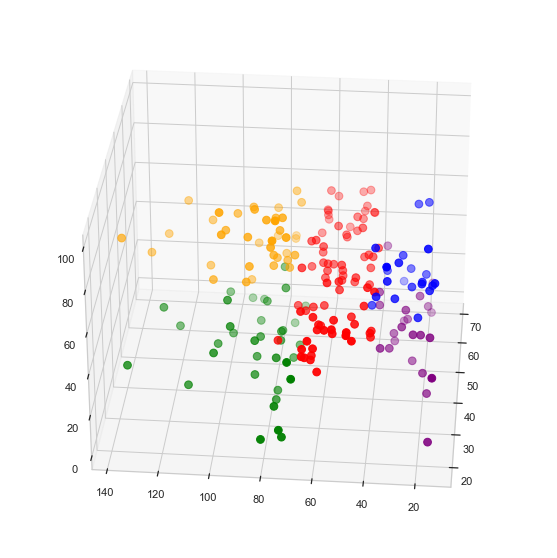

In [72]:
## done in terms of / with respects to the above clusters features ranging from 0-4 ..!!..,,;;
clusters = kmeans.fit_predict(X3)
df["label"] = clusters

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(20,10))
ax= fig.add_subplot(111, projection='3d')
ax.scatter(df.Age[df.label == 0], df['Annual Income (k$)'][df.label==0], df["Spending Score (1-100)"][df.label==0], c='blue', s=60)
ax.scatter(df.Age[df.label == 1], df['Annual Income (k$)'][df.label==1], df["Spending Score (1-100)"][df.label==1], c='red', s=60)
ax.scatter(df.Age[df.label == 2], df['Annual Income (k$)'][df.label==2], df["Spending Score (1-100)"][df.label==2], c='green', s=60)
ax.scatter(df.Age[df.label == 3], df['Annual Income (k$)'][df.label==3], df["Spending Score (1-100)"][df.label==3], c='orange', s=60)
ax.scatter(df.Age[df.label == 4], df['Annual Income (k$)'][df.label==4], df["Spending Score (1-100)"][df.label==4], c='purple', s=60)
ax.view_init(30,185)


We have 5 type of customer and we grouped them as you can see above.